In [1]:
# import jtplot module in notebook
#from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#jtplot.style()

<img src="title.png">

### <font color='#008000'>Are you about starting a Diamond Mining / Selling Company? or </font> 
### <font color='#008000'>You're already a Diamond Merchant looking for Digital Analytics to increase Profit?</font>

#### YES,
here is your **DiAna-Handbook** guiding popular Data Analytics & Visualization of various Diamonds.
DiAna is distinctive because of its flexibility in accpeting Data according to individual taste and satisfies delivering efficienct analysis.

DiAna's reference Dataframe has been extracted from one of the popular resource, which includes various Diamonds characteristics. Let's get started!

The flow of the Case Study is as below:<br>
* **<font color='blue'>1.0 Prepare Data</font>**
    - Reading the Data
    - Studying the Distribution of Variables
    - Confirming $Null$ Values
    - Controlling $0$ vlaues & its behaviour
    - Outlier Treatment
* **<font color='blue'>2.0 EDA</font>**
    - Primary Data Exploration
    - Sample Example on Requirements from the Client
        - Visual Exploratory Data Analysis for Data Distribution
        - Visual Correlation Analysis
        - Statistical Correlation Analysis using Hypotheses and p-value    
* **<font color='blue'>3.0 Data Mining</font>**
    - Segmenting Feature Selection
        - Selecting Dynamic Target Variables and generating combinations of Dataset
        - Visual Exploratory For Dynamically selected Dataset
    - Extended Visualization Analysis*(KDD)*
* **<font color='blue'>4.0 DiAna Advancements</font>**                

**<font color='#D35400'>Loading Libraries</font>**

In [2]:
#import packages

import numpy as np 
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import display, Image

# For plotting & visualizations
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly
#import plotly.graph_objs as go
#import plotly.express as px

# For Statistical visualizations
from scipy import stats
from scipy.stats import linregress
import investpy as ip

# For Ignoring Warnings
import warnings
warnings.filterwarnings("ignore")

# loads the graph by default
%matplotlib inline 


# <font color='#D35400'>1.0 Prepare Data</font>

In [3]:
# load data
df = pd.read_csv('diamonds.csv')
df # df is the name of our Main Diamond DataFrame

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
# Observing the summarized information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


### <font color='#D35400'>Data Description</font>
The **df** *Dataframe* contains $11$ different attributes of $53,940$ Diamonds.
The business meaning of each column is as below:

| Column Name | Description |
| --- | --- |
| carat | Diamond’s physical weight measured in *metric* carats. $1$ carat $=$ $1/5 gram$ |
| cut | Cut type of the Diamond, it determines the shine |
| color |  Color value of the Diamond, from **J = worst** to **D = best**|
| clarity |Clarity **(I1 (worst)**, SI2, SI1, VS2, VS1, VVS2, VVS1, **IF (best)**|
| depth | Depth value of the Diamond in % = $\frac{z}{mean(x,y)} \% =2 \cdot \frac{z}{x+y} \% $ |
| table | Flat surface of the Diamond visible from top | 
| price | Trade Price in US Dollar |
| x | Length in mm |
| y | Width in mm |
| z | Depth in mm |

**The first column is an index ("Unnamed: 0") and thus we are going to remove it.**

In [5]:
# deleting the Unnamed: 0 column
df.drop(columns=('Unnamed: 0'), axis=1, inplace=True)

**Encoding *x , y , z* column names**

In [6]:
# rename x,y,z in length_mm, width_mm, depth_mm
df.rename(columns = {'x': 'length_mm', 'y': 'width_mm', 'z': 'depth_mm'}, inplace = True)
df

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Confirming *Null* values**

In [7]:
# creating count of Null values in dataframe
count = df.isnull().sum().sort_values(ascending=False)
perc = count / len(df)
missing_data = pd.concat([count, perc], axis=1, keys=['count', 'percent'])
missing_data

,count,percent
depth_mm,0,0.0
width_mm,0,0.0
length_mm,0,0.0
price,0,0.0
table,0,0.0
depth,0,0.0
clarity,0,0.0
color,0,0.0
cut,0,0.0
carat,0,0.0


⇒ **Findings:**
* **No Null Values were discovered in df**

In [8]:
# Looking at the descriptive statistics of the data
df.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**The above Table shows us the results from *Min and Max* values have unusual behaviour and hence we need to control the data at this place and perform Data Cleaning**

In [9]:
#checking no. of '0' values in the length_mm entries
df[df.length_mm == 0]

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [10]:
#checking no. of '0' values in the width_mm entries
df[df.width_mm == 0]

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


In [11]:
#checking no. of '0' values in the depth_mm entries
df[df.width_mm == 0]

,carat,cut,color,clarity,depth,table,price,length_mm,width_mm,depth_mm
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.0,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.0,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.0,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.0,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.0,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.0,0.0


**The ratio of** $0$ **values in our df is less; hence it is feasible to clean these values**

In [12]:
df= df[(df.width_mm >0) & (df.length_mm >0)& (df.depth_mm >0)== True ] # cleaning the zero values 

In [13]:
df.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


**Outliers**

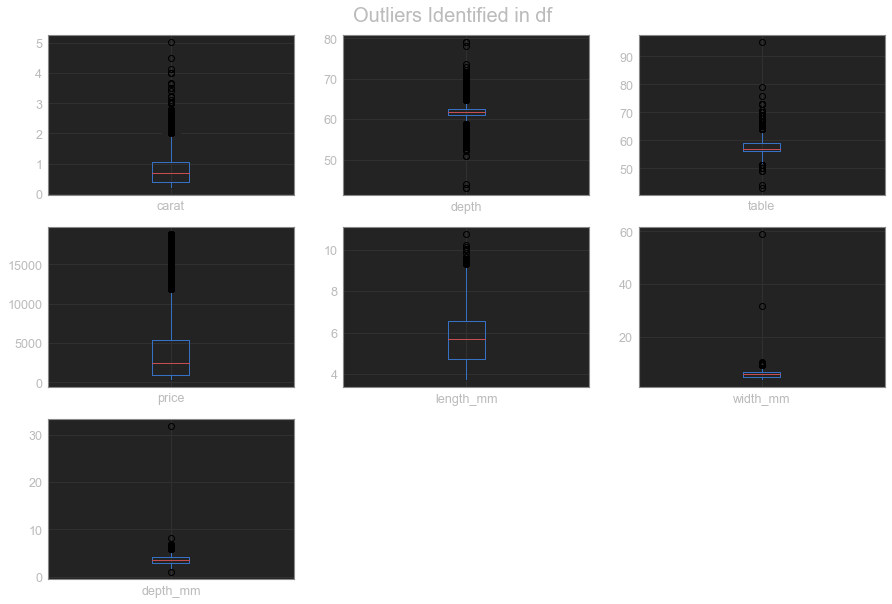

In [14]:
# Box plot to analyse Outliers
df.plot(kind='box',figsize=(15,10),subplots=True,layout=(3,3))
plt.suptitle("Outliers Identified in df",fontsize=20, y=0.92)
plt.show()

⇒ **Findings:**
* **Outliers has been identified, and can be seen as the extreme values in above Box plot.**

**Controlling Outliers**
* **The distributions of outlier values for variables (carat, price, table) were decided not to be manipulated to maintain insights on the Natural data. the depth Hence, the focus of the outlier elimination step is on the variables (length_mm, width_mm, depth_mm), since the maximum values were interpretated as non valid.**

* **The outlier treatment is achieved by calculating the interquartile range ( lower whisker and upper whisker values) and accordingly focused in eliminating the Upper whisker only.**

In [15]:
# creating function to treat Outliers
def outlier(df,x):
    '''Outlier Function'''
    q75, q25 = np.percentile(x, [75 ,25]) # fetching the upper & lower quartile values
    iqr = q75 - q25                       #intermediate quartile    
    Lower_Whisker = q25 -1.5 * iqr        #calculate lower whisker
    Upper_Whisker = q75 +1.5 * iqr        #calculate upper whisker
    df = df[x < Upper_Whisker]
    return df

**Controlling Outliers for length_mm, width_mm & depth_mm variables**

In [16]:
df = outlier(df, df.length_mm) # treating upper whisker outliers

In [17]:
df = outlier(df, df.width_mm) # treating upper whisker outliers

In [18]:
df = outlier(df, df.depth_mm) # treating upper whisker outliers
df.describe()

,carat,depth,table,price,length_mm,width_mm,depth_mm
count,53878.000000,53878.000000,53878.000000,53878.000000,53878.000000,53878.000000,53878.000000
mean,0.795909,61.748723,57.456138,3923.089090,5.728963,5.730850,3.537702
std,0.469101,1.430309,2.233301,3976.881464,1.115411,1.107457,0.688886
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2399.500000,5.700000,5.710000,3.520000
75%,1.040000,62.500000,59.000000,5313.000000,6.540000,6.530000,4.030000
max,3.050000,79.000000,95.000000,18823.000000,9.260000,9.250000,5.690000


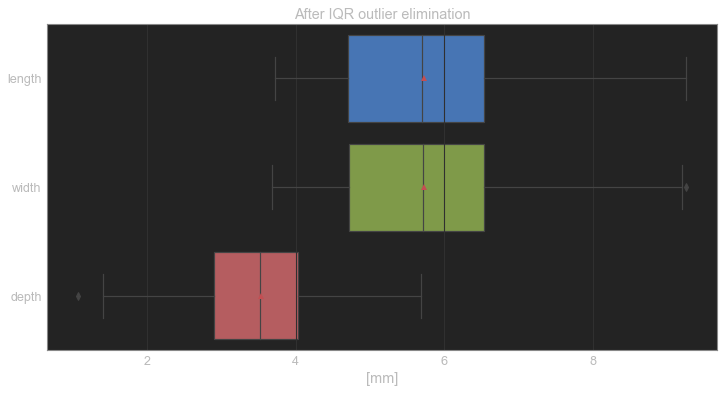

In [19]:
# Visualizing distribution after outlier treatment
f, axes = plt.subplots(1, 1, figsize=(12,6))
g = sns.boxplot(data=df[["length_mm","width_mm","depth_mm"]], showmeans=True, orient = 'h').set(
    title="After IQR outlier elimination",
    xlabel='[mm]',
    yticklabels=["length", "width", "depth"]);
plt.show()

# <font color='#D35400'>2.0 Exploratory Data Analysis </font>

**Primary Data Exploration**

In [20]:
# Finding unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
df.nunique()

carat          257
cut              5
color            7
clarity          8
depth          184
table          127
price        11582
length_mm      527
width_mm       524
depth_mm       345
dtype: int64

Data Type in Statistics are as below:
    
| Categorical | Continious |
| --- | --- |
| cut | carat|
| color  | depth |
| clarity |  table|
| |price |
| |  (x) length_mm |
| | (y) width_mm| 
|| (z) depth_mm |

**Visual Exploratory Data Analysis**
* Categorical variables: Bar plot
* Continuous variables: Histogram

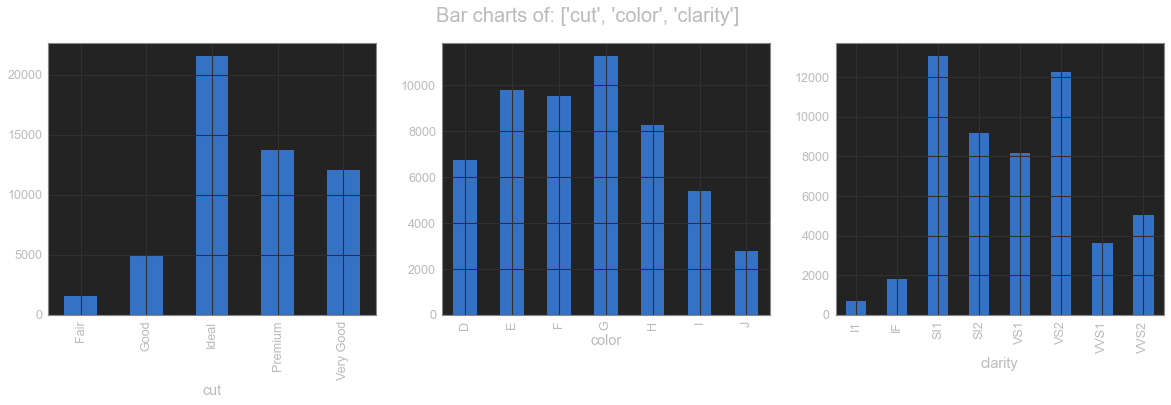

In [21]:
# Plotting barplot of multiple columns together

col_list=["cut", "color", "clarity"]
fig, axes=plt.subplots(1,3, figsize=(20,5))
for i, j in zip(col_list, range(len(col_list))):
    df.groupby(i).size().plot(kind='bar',ax=axes[j]);
fig.suptitle('Bar charts of: '+ str(col_list), fontsize=20);

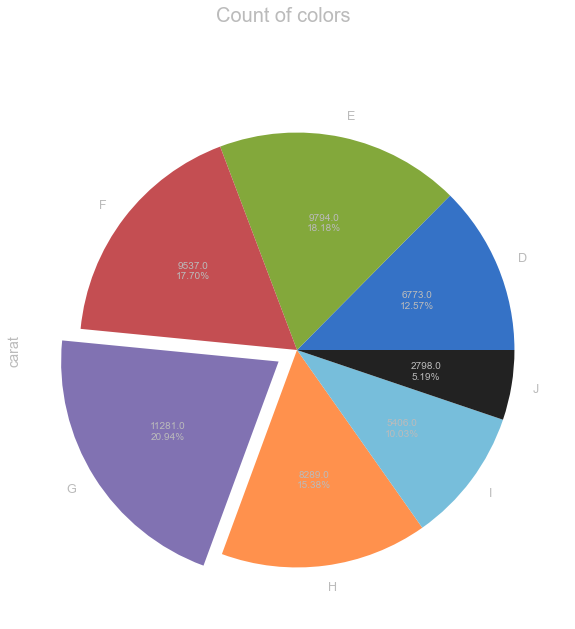

In [22]:
#Another type of Visualization of Categorical variable 'color' in df using Pieplot

row_count = len(df)
def abs_and_percent(p):
    a = np.round(p/100.*row_count, 0)
    s ='{}\n{:.2f}%'.format(a,p)
    return s

explode = (0, 0, 0,0.1, 0, 0, 0)
df_sums=df.groupby(['color']).count()
# df_sums
df_sums["carat"].plot.pie(subplots= True, explode=explode,autopct=abs_and_percent, figsize=(15,10));
plt.suptitle('Count of colors', fontsize=20);

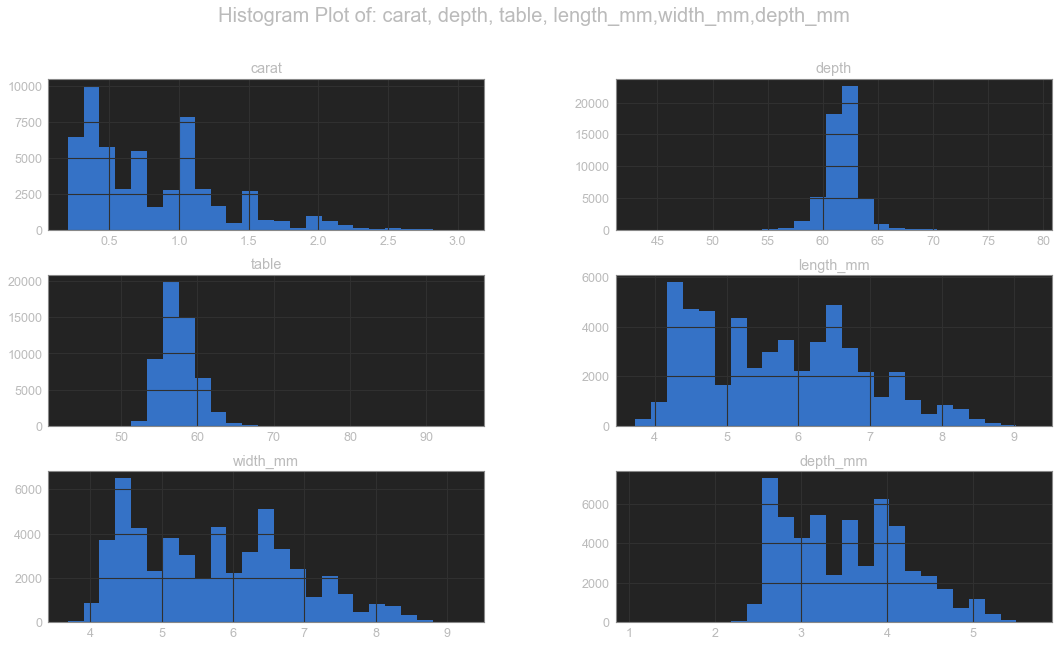

In [23]:
# Plotting histograms of multiple columns together
df.hist(['carat', 'depth', 'table', 'length_mm','width_mm','depth_mm'], bins = 25, figsize=(18,10));
plt.suptitle('Histogram Plot of: carat, depth, table, length_mm,width_mm,depth_mm', fontsize=20);

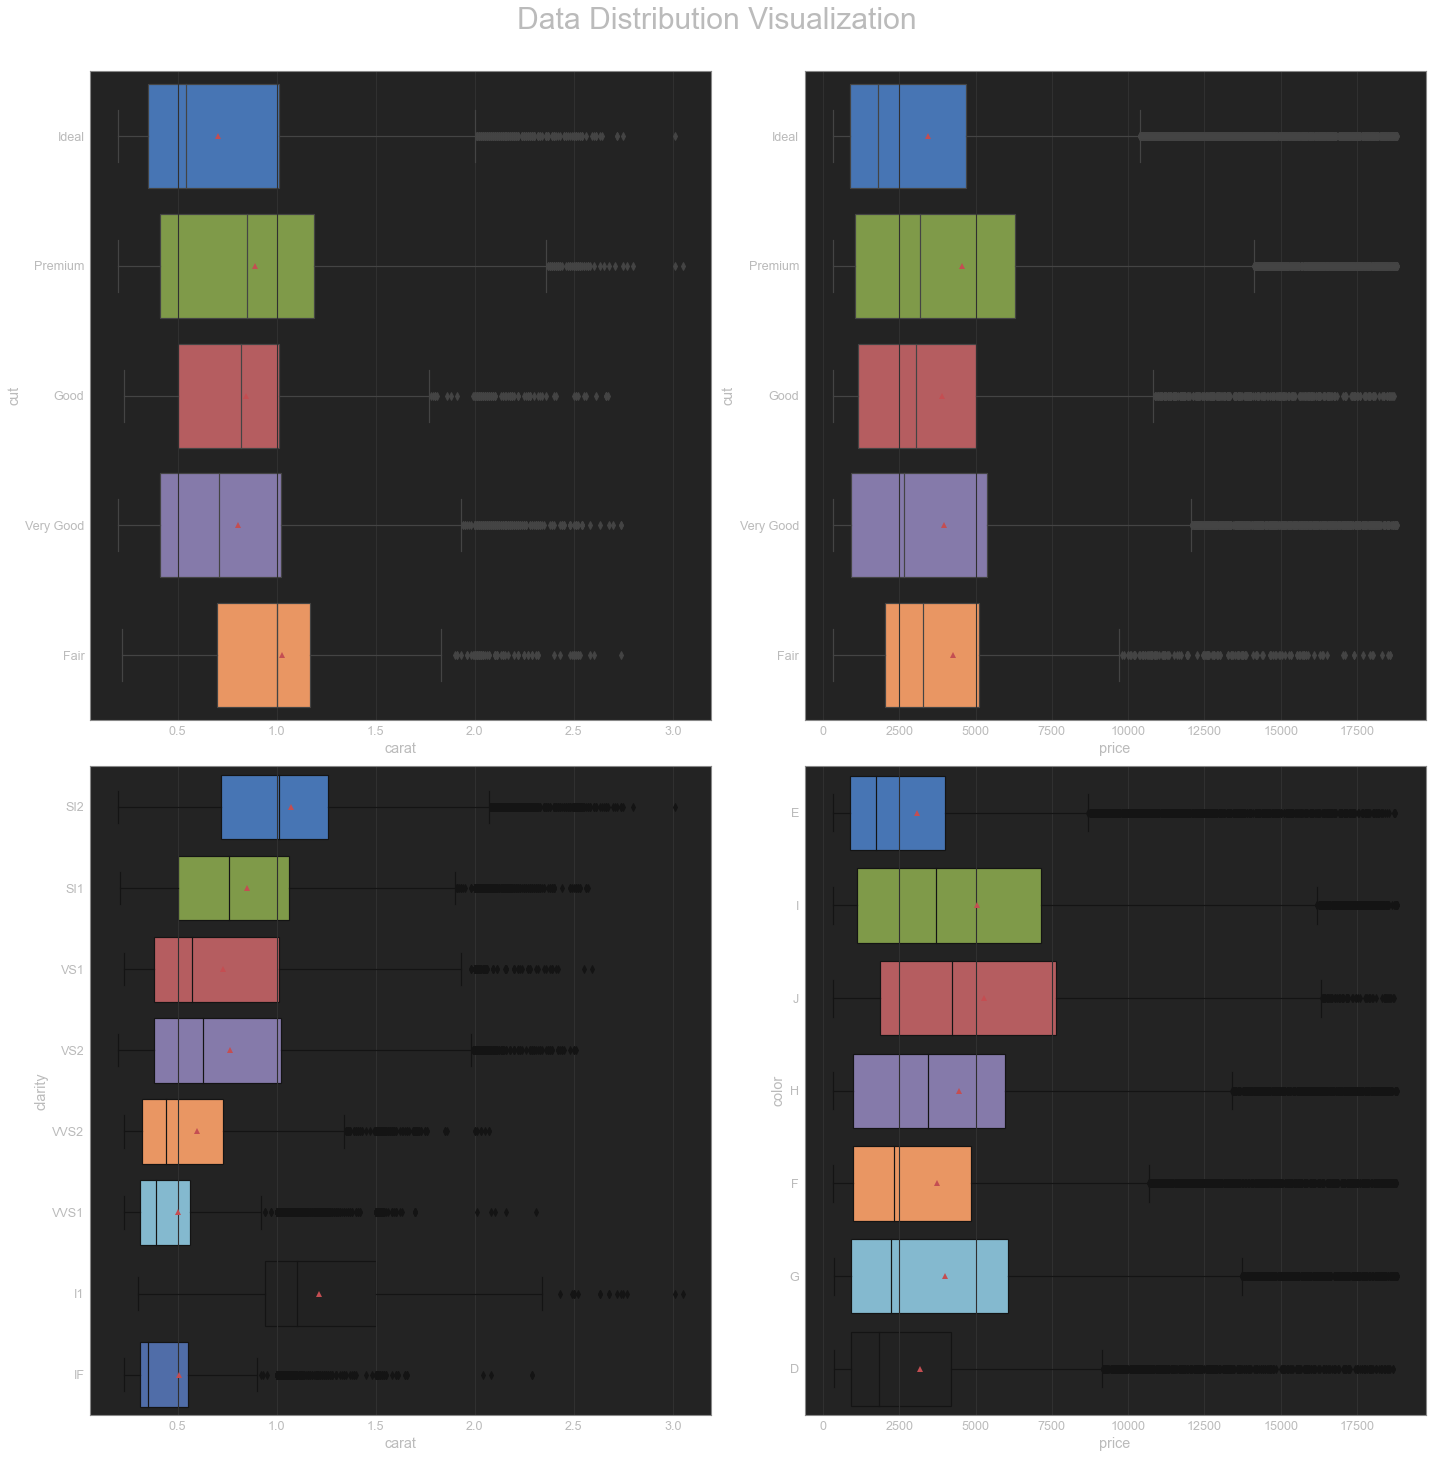

In [24]:
# Plotting Box for Data Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(20,20), tight_layout = True)
sns.boxplot( y=df["cut"], x=df["carat"], showmeans=True, ax=axes[0,0] );
sns.boxplot( y=df["cut"], x=df["price"], showmeans=True, ax=axes[0,1] );
sns.boxplot( y=df["clarity"], x=df["carat"], showmeans=True, ax=axes[1,0] );
sns.boxplot( y=df["color"], x=df["price"], showmeans=True, ax=axes[1,1] );
fig.suptitle("Data Distribution Visualization",fontsize=30, y=1.01)
plt.show()

**Sample Example on an Assignment / Requirements from the Client**

# <font color='#B7950B'>Task 1<br> </font>

<font color='#7D3C98'>Determine the number of diamonds and the respective x, y and z median of the diamonds with a carat greater than 2 and less than 4. </font>

**filter the dataframe**

In [25]:
# extracting the data with carat greater than 2 and less than 4
df2= df[((df.carat > 2)&(df.carat < 4)) == True]

**confirming the data set after Filtering**

In [26]:
df2.carat.min() # check min value

2.01

In [27]:
df2.carat.max() # check max value

3.05

In [28]:
df2.shape # df2 is an extracted dataset with carat greater than 2 and less than 4

(1844, 10)

In [29]:
print('The Number of Diamonds with carat greater than 2 and less than 4 are:',df2.shape[0])

The Number of Diamonds with carat greater than 2 and less than 4 are: 1844


**Additional analysis to determine No. of Values in each category for df2 dataframe**

In [30]:
entries = [] # List for number of different entries in a column
for i in df2.columns:
    entries.append(len(pd.unique(df2[i])))
print(f"{df2.columns[0].title()}: {entries[0]}\n{df2.columns[1].title()}: {entries[1]}")
print(f"{df2.columns[2].title()}: {entries[2]}\n{df2.columns[3].title()}: {entries[3]}")

Carat: 76
Cut: 5
Color: 7
Clarity: 8


**Provide Median values**

In [31]:
# display Median values
print("The Median values for x,y,z in df2 Dataframe are as below: ",
'\n(x)- length_mm(length in mm):', df2.length_mm.median(),
'\n(y)- width_mm (witdh in mm):', df2.width_mm.median(),
'\n(z)- depth_mm (depth in mm):', df2.depth_mm.median(),)

The Median values for x,y,z in df2 Dataframe are as below:  
(x)- length_mm(length in mm): 8.21 
(y)- width_mm (witdh in mm): 8.19 
(z)- depth_mm (depth in mm): 5.05


# <font color='#B7950B'>Task 2<br> </font>

**<font color='#7D3C98'>a) How many diamonds of each color are there that are the same width and length?**</font>

In [32]:
# extracting the data with diamonds for each color which have same width and length
df3 = df[((df.width_mm)==(df.length_mm)) == True].groupby("color").count()

# renaming the column to Counts for classifying the results
df3.rename(columns = {'carat':'counts'}, inplace = True)
df3

,counts,cut,clarity,depth,table,price,length_mm,width_mm,depth_mm
color,,,,,,,,,
D,1,1,1,1,1,1,1,1,1
E,2,2,2,2,2,2,2,2,2
F,3,3,3,3,3,3,3,3,3
G,2,2,2,2,2,2,2,2,2
H,2,2,2,2,2,2,2,2,2


In [33]:
#reset index
df3.reset_index(inplace = True)
df3

,color,counts,cut,clarity,depth,table,price,length_mm,width_mm,depth_mm
0,D,1,1,1,1,1,1,1,1,1
1,E,2,2,2,2,2,2,2,2,2
2,F,3,3,3,3,3,3,3,3,3
3,G,2,2,2,2,2,2,2,2,2
4,H,2,2,2,2,2,2,2,2,2


In [34]:
#df3.loc[2:]
#viol_plot.ax.legend(loc=2)

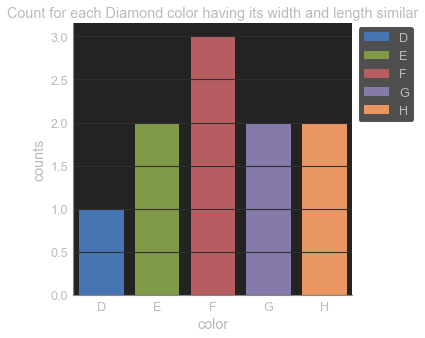

In [35]:
# Barplot to visualize the No. of Values
widthbars = df3['counts'].tolist()

fig,axes = plt.subplots(figsize=(5, 5))
a = sns.barplot(x="color", y="counts", data=df3,ax=axes, hue = "color", dodge = False); # dodge is the argument to control width of bars
a.set(title='Count for each Diamond color having its width and length similar')
plt.legend(bbox_to_anchor=[1, 1.01])
sns.despine(fig)

In [36]:
# display the results
for i in range(0, len(df3)):
    print(f" There are {df3.counts[i]} Diamond entries for color {df3.color[i]} having similar Width & Length \n")

 There are 1 Diamond entries for color D having similar Width & Length 

 There are 2 Diamond entries for color E having similar Width & Length 

 There are 3 Diamond entries for color F having similar Width & Length 

 There are 2 Diamond entries for color G having similar Width & Length 

 There are 2 Diamond entries for color H having similar Width & Length 



**<font color='#7D3C98'>b)What colors are present in above task(a) and; what are Largest_height values and Smallest_height values for Diamonds in it)?</font>**

In [37]:
#extending the selection condition from the above to further satisfy & receive 
#min & max height values
df4= df[((df.width_mm)==(df.length_mm)) == True].groupby(['color']).agg(['max','min'])['depth_mm']
df4

,max,min
color,,
D,2.74,2.74
E,3.89,3.89
F,3.16,2.59
G,4.23,3.31
H,3.01,2.70


In [38]:
# reset index
df4.reset_index(inplace = True)
df4

,color,max,min
0,D,2.74,2.74
1,E,3.89,3.89
2,F,3.16,2.59
3,G,4.23,3.31
4,H,3.01,2.70


In [39]:
# the cat dataframe is used for stacking the columns & its values for display of Categorial Data
cat = df4.melt(id_vars='color').rename(columns=str.title)

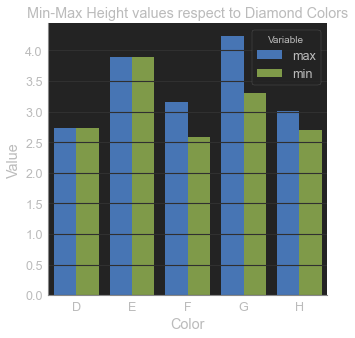

In [40]:
# visualiziation of Min & max values respect to diamond colors
fig, ax1 = plt.subplots(figsize=(5, 5))
g = sns.barplot(x='Color', y='Value', hue='Variable', data=cat , ax=ax1)
g.set(title="Min-Max Height values respect to Diamond Colors")
sns.despine(fig)

# <font color='#B7950B'>Task 3<br> </font>

<font color='#B7950B'>**Task 3: Useful Info**<br> </font>
<font color='#7D3C98'>
IDEX is the leading online diamond trading platform. The price list for determining the diamond price from January 2021 is available on the Internet. An extract for diamonds with a carat between 0.7 and 0.79 is shown here in this exercise. The entire list is available for inspection in the folder.

To determine the price of a diamond, the 4Cs need to be considered:

    - Color
    - Clarity
    - Cut
    - Carat weight

***********************************************************************************************
The following procedure is necessary in order to be able to read the list:

1. The sub-table is selected based on the carat value (here: 0.7 - 0.79 carat)
2. The Clarity and Color categories can be read from the list:
3. At the intersection of both characteristics in the table, you can see the dollar price for 1 carat.
4. Multiply this dollar price by the carat value of the respective diamond.

You will surely notice that the cut feature is missing ...

<font color='#B7950B'>Task 3 Described: <br> </font>

First filter the data set for the carat values ​​between 0.7 - 0.79.

Select two different features each, Color and Clarity. Find the value of each diamond using the table. This extracted dollar price is then multiplied by the carat value of the respective diamond. Let's call this result the "purchase price".

* a) What are the price differences between the price of the data set and the purchase price? (Note: I can well imagine that the purchase price you determined is higher than the price in the data set. The purchase price you determined is based on the value in January 2021 and the data set is already over 4 years old.)

* b) Are there any connections between the differences to the other existing characteristics (i.e. apart from Carat, Clarity and Color)?

<font color='#B7950B'>Task 3 Extended Description: <br> </font>
The price is determined by the 4Cs. However, we only have the 3Cs (carat, clarity and color) are used. Therefore, one could dare to take a special look at the cut: 
*  Plot the original prices (for our selected feature of the new price determination) with a distinction for each cut feature ⇒ are differences recognizable there?
* Plot the new prices determined with a distinction for each cut feature ⇒ there are differences recognizable?
* Plot the differences between the original price and the new price with differentiation each Cut feature ⇒ there are similar patterns as with the original prices or new prices recognizable. If not, write this down as well.
* It can also be checked whether other Cut, Carat and Color are the same or other trends or no trends at all are visible.
* If samples can be seen in the original prices, but in the determined ones Not re-pricing, it can be assumed that the cut does play a role.
* When we recognize a pattern, we can try the ratios of knowledge on the Apply new price.
    
⇒ So communicate this suggestion to management.</font>

In [41]:
# determine the clarity values
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

**⇒ Findings: <br>**
* **Our df Dataframe does not contain Diamonds with Sl2 & Sl3 clarity values**

# <font color='#B7950B'>Task 3.a :<br> </font>

**With reference to the above description for Task (3.a), below two combinations are used to perform Analysis on price differences between the 'price' variable of the dataframe and the 'purchase price'variable?**<br>

* **for Color "D" with clarity "VVS1"**
* **for Color "I* with clarity "IF"**

In [42]:
#create function to filter the dataframe

def color_D_df(df):      
    '''Filter the data set with carat values, between 0.7 - 0.79., color="D" & clarity="VVS1"'''
    df2 = df[((df.carat > 0.7)&(df.carat < 0.79)&(df.color=='D')&(df.clarity=='VVS1'))==True]
    #dollar price multiplied by carat value to derive "purchase price"
    df2["purchase_price"]= df2.price*df2.carat
    df2["IDEX_price"]= df2.carat*10774
    df2["Diff_price"]= df2["IDEX_price"]-df2["purchase_price"]
    
    return df2

In [43]:
#create function to filter the dataframe

def color_I_df(df):
    '''Filter the data set with carat values, between 0.7 - 0.79., color="I" & clarity="IF"'''
    df2 = df[((df.carat > 0.7)&(df.carat < 0.79)&(df.color=='I')&(df.clarity=='IF'))==True]
    #dollar price multiplied by carat value to derive "purchase price".
    df2["purchase_price"]= df2.price*df2.carat 
    df2["IDEX_price"]= df2.carat*6203 # prices refer to the IDEX price list
    df2["Diff_price"]= df2["IDEX_price"]-df2["purchase_price"]     
    
    return df2

In [44]:
#assigning function to create the dataframe

col_D_df= color_D_df(df)
col_I_df= color_I_df(df)

In [45]:
#choosing selective columns for Categorical Data Plotting

df5=col_D_df[["cut","purchase_price","IDEX_price"]]
df8=col_D_df[["cut","purchase_price","IDEX_price"]]

In [46]:
#assigning the variables to Categorical Plot

col_D_HC_tidy = df5.melt(id_vars='cut').rename(columns=str.title)
col_I_HC_tidy = df8.melt(id_vars='cut').rename(columns=str.title)

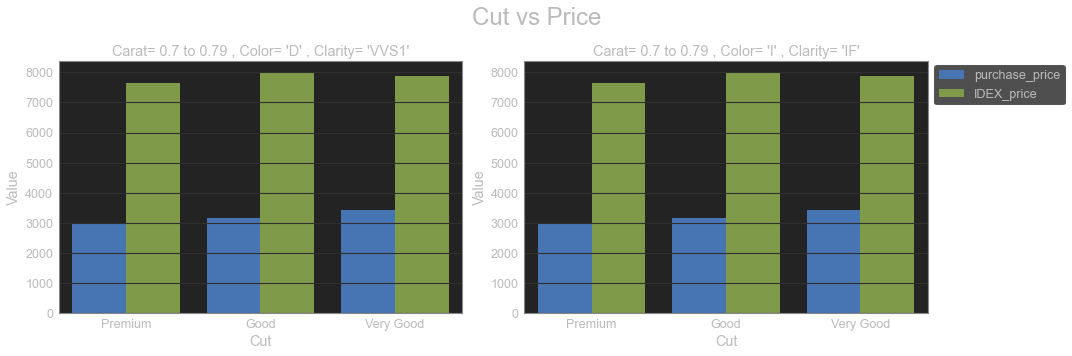

In [47]:
# categorical groupbar plot

fig, axes = plt.subplots(1,2, figsize=(15, 5), tight_layout = True)
g =sns.barplot(x='Cut', y='Value',hue='Variable', data=col_D_HC_tidy , ci = None, ax=axes[0]);
b = sns.barplot(x='Cut', y='Value', hue='Variable', data=col_I_HC_tidy , ci = None,ax=axes[1]);
g.set(title="Carat= 0.7 to 0.79 , Color= 'D' , Clarity= 'VVS1'")
b.set(title="Carat= 0.7 to 0.79 , Color= 'I' , Clarity= 'IF'")
plt.legend(bbox_to_anchor=[1, 1.01])
g.legend_.remove()
plt.suptitle("Cut vs Price",fontsize=24, y=0.98)
plt.show()

**⇒ Findings: <br>**
* **There were similar patterns found betweeen the original prices & new purchase prices**
* **Color & Clarity doesn't influence Price for these two combinations as the data are equally distributed**

**Confirming the above pattern for same combinations , but with different lower carat values, between 0.4 - 0.44**

In [48]:
#create function to filter the dataframe

def color_D_LC_df(df):      
    '''Filter the data set with carat values, between 0.40 - 0.44., color="D" & clarity="VVS1"'''
       #dollar price multiplied by carat value to derive "purchase price".
    df2["purchase_price"]= df2.price*df2.carat
    df2["IDEX_price"]= df2.carat*5141 # prices refer to the IDEX price list
    df2["Diff_price"]= df2["IDEX_price"]-df2["purchase_price"]     
    
    return df2

In [49]:
#create function to filter the dataframe

def color_I_LC_df(df): 
    '''Filter the data set with carat values, between 0.40 - 0.44, color="I" & clarity="IF"'''
    df2 = df[((df.carat > 0.40)&(df.carat < 0.44)&(df.color=='I')&(df.clarity=='IF'))==True]
    #dollar price multiplied by carat value to derive "purchase price".
    df2["purchase_price"]= df2.price*df2.carat
    df2["IDEX_price"]= df2.carat*3403 # prices refer to the IDEX price list
    df2["Diff_price"]= df2["IDEX_price"]-df2["purchase_price"]     
    
    return df2

In [50]:
#assigning function to create the dataframe

col_D_LC_df = color_D_LC_df(df)
col_I_LC_df = color_I_LC_df(df)

In [51]:
#choosing selective columns for Categorical Data Plotting

df7 = col_D_LC_df[["cut","purchase_price","IDEX_price"]]
df9 = col_I_LC_df[["cut","purchase_price","IDEX_price"]]

In [52]:
#assigning the variables to Categorical Plot

col_D_LC_tidy = df7.melt(id_vars='cut').rename(columns=str.title)
col_I_LC_tidy = df9.melt(id_vars='cut').rename(columns=str.title)

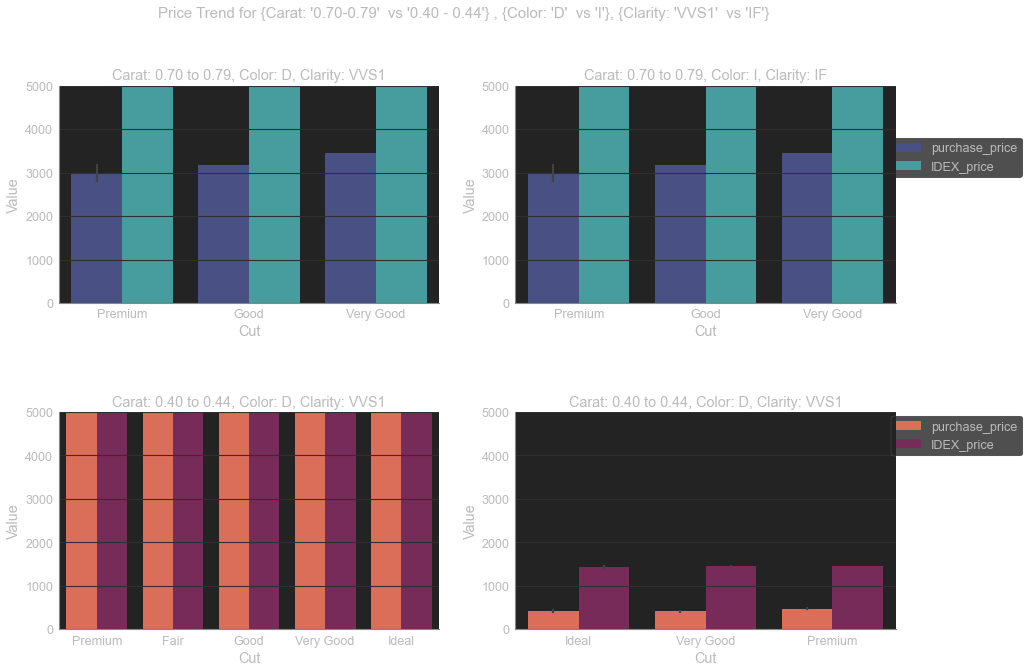

In [53]:
# categorical groupbar plot for multiple combinations
fig, axes = plt.subplots(2, 2, figsize=(15,10))

p1 = sns.barplot(x="Cut", y="Value",hue='Variable', data=col_D_HC_tidy, palette="mako",ax = axes[0,0]);
p2 = sns.barplot(x="Cut", y="Value", hue='Variable', data=col_I_HC_tidy, palette="mako", ax = axes[0,1]);
p3 = sns.barplot(x="Cut", y="Value", hue='Variable', data=col_D_LC_tidy, palette="rocket_r", ax = axes[1,0]);
p4 = sns.barplot(x="Cut", y="Value", hue='Variable', data=col_I_LC_tidy,palette="rocket_r", ax = axes[1,1]);
p1.set_title("Carat: 0.70 to 0.79, Color: D, Clarity: VVS1")
p2.set_title("Carat: 0.70 to 0.79, Color: I, Clarity: IF")
p3.set_title("Carat: 0.40 to 0.44, Color: D, Clarity: VVS1")
p4.set_title("Carat: 0.40 to 0.44, Color: D, Clarity: VVS1")
p2.legend_.remove()
p3.legend_.remove()
p4.legend_.remove()
p1.set(ylim=(0,5000));
p2.set(ylim=(0,5000));
p3.set(ylim=(0,5000));
p4.set(ylim=(0,5000));
p1.legend(bbox_to_anchor=[2.55, 0.79])        
plt.legend(bbox_to_anchor=[1.35, 1.01])       # to move the legend outside the figure;
fig.subplots_adjust(hspace=.5)
fig.suptitle("Price Trend for {Carat: '0.70-0.79'  vs '0.40 - 0.44'} , {Color: 'D'  vs 'I'}, {Clarity: 'VVS1'  vs 'IF'}",fontsize=15, y=0.99)
sns.despine(fig)

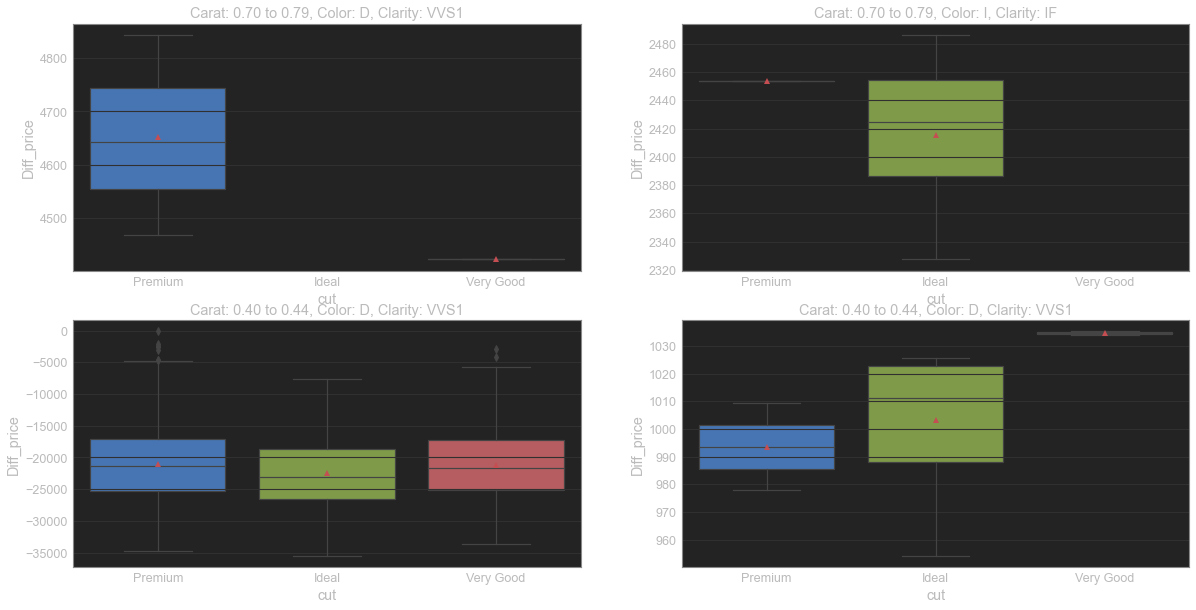

In [54]:
#Visualizing the Price_Differnece between Purchase Price & IDEX price in boxplot

f, axes = plt.subplots(2,2, figsize=(20,10))
p1 = sns.boxplot(x="cut", y="Diff_price", data=col_D_df,showmeans=True,ax=axes[0,0], order = ["Premium", "Ideal", 'Very Good']);
p2 = sns.boxplot(x="cut", y="Diff_price", data=col_I_df,showmeans=True, ax=axes[0,1], order = ["Premium", "Ideal", 'Very Good']);
p3 = sns.boxplot(x="cut", y="Diff_price", data=col_D_LC_df,showmeans=True,ax=axes[1,0], order = ["Premium", "Ideal", 'Very Good']);
p4 = sns.boxplot(x="cut", y="Diff_price", data=col_I_LC_df,showmeans=True, ax=axes[1,1], order = ["Premium", "Ideal", 'Very Good']);
p1.set_title("Carat: 0.70 to 0.79, Color: D, Clarity: VVS1")
p2.set_title("Carat: 0.70 to 0.79, Color: I, Clarity: IF")
p3.set_title("Carat: 0.40 to 0.44, Color: D, Clarity: VVS1")
p4.set_title("Carat: 0.40 to 0.44, Color: D, Clarity: VVS1")
fig.subplots_adjust(hspace=1.15)
plt.show()

**⇒ Conclusion of Task 3.a & its Findings: <br>**
* **We see in boxpot that the difference between purchase price and IDEX price is much more higher with diamonds that have high carat values(0.70-0,79) than with diamonds with low carat values(0.40-0.44).** 
* **Thus, We can conclude and propose a Business Plan indicating that investing in Diamonds with high carat values brought more profit than diamonds with low carat values regardless of color and clarity values.**
* **Taking into account the findings we can mention that it would also be valid for other color and clarity values considering the effect of carat values on price.**

# <font color='#B7950B'>Task 3.b :<br> </font>

**b) Are there any connections between the differences to the other existing characteristics (i.e. apart from Carat, Clarity and Color)?**

**In order to get a rough overview about the dataset and to get understanding about corellation between categorical and continuous variables, a pairplot is presented:**

* We aim to see the correlation between our variables based on cut of diamonds. 
* In other words, understanding the relation between the characteristics of the diamonds would be helpful in analysing diamonds. 

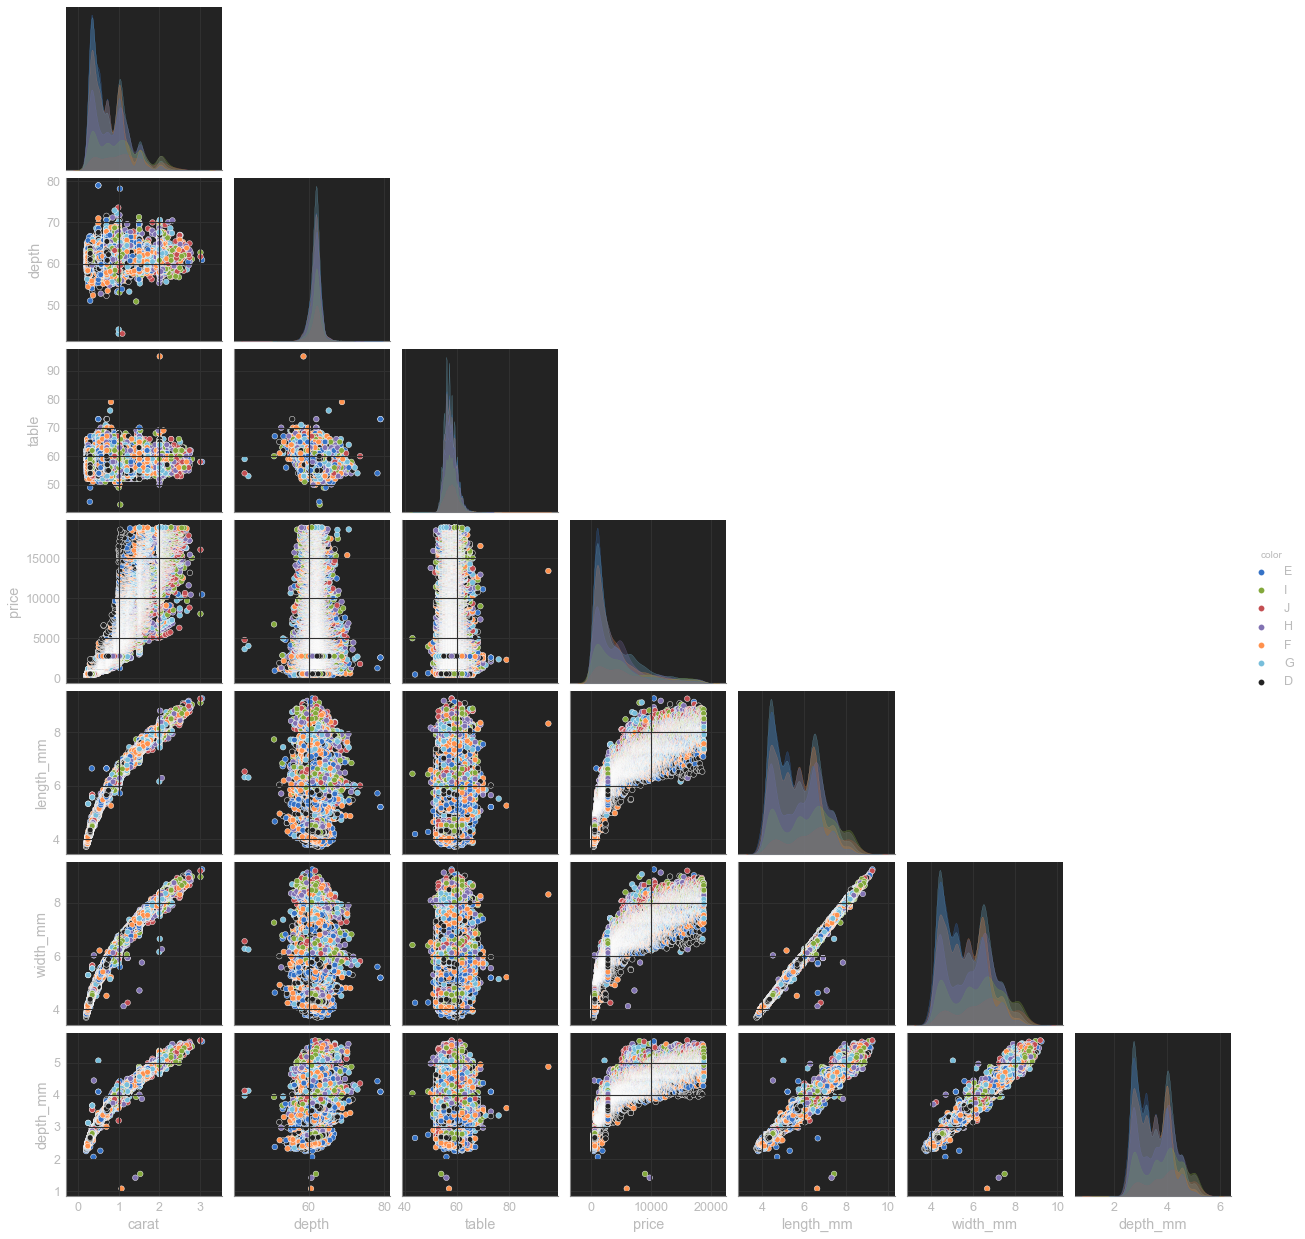

In [55]:
sns.pairplot(data=df, hue='color', corner=True)

**From out pairplot, we can conclude that there is a strong correlation betweeen lenght, width, depth_mm and carat values of diamonds.**  

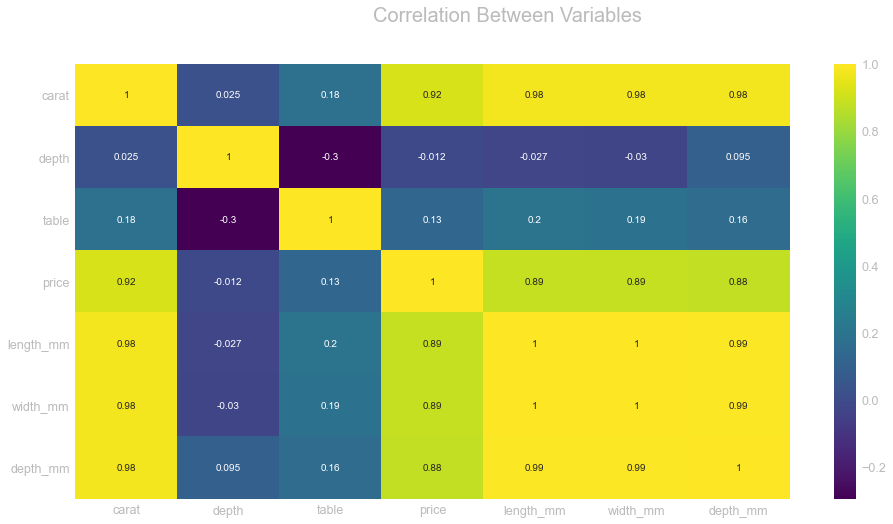

In [56]:
# corr() function to retreive the results
cor = df.corr()
#plot the correlation in Heatmap plot
plt.figure(figsize = (16,8))
sns.heatmap(cor, annot = True, cmap = "viridis");
plt.suptitle("Correlation Between Variables", fontsize=20);

<!-- Serkan's comments:

#The prices don't show strong tendency. However, especially ideal, premium and good cut diamonds in general more expensive than the other cuts. 
#The prices are distributed not equally on each cut form. Especially the market for diamonds with price until 10.000 Euros is vast. To conclude more meaningful results we need to
#do a market-analysis based on the mostly prefered diamonds. If possible on world, continent, region, country scales. -->

**⇒ Key finding: the Price of the Diamond is highly correlated to Carat, and its Dimensions: <br>**

1. The Weight (Carat) of a diamond has the most significant impact on its Price (0.92). Since, the larger a stone is, the Rarer it is, one 2 carat diamond will be more 'Expensive' than the total cost of two 1 Carat Diamonds of the same Quality.

2. Depth shows negative correlation (-0.012) inversely related to Price.

3. The corelation of Table vs. Depth (-0.3) shows a negative relation.  

4. The Length(x) , Width(y) and Depth(z) seems to be higly related to Price and even each other.

# Statistical Correlation Analysis

**Method:**  
the following linear regression method lineregress( ) from SciPy tests if the slope of the regression equation between 2 variables equals Zero (= no significant correlation) or not (=significant correlation)    


linregress( ) has the following output variables:  
* slope : slope of the regression line
* intercept : intercept of the regression line
* r-value : correlation coefficient
* p-value : two-sided p-value for a hypothesis test whose null hypothesis is that the slope is zero
* stderr : Standard error of the estimate

**Hypothesis of Test #1: Depth is correlated to Price.**<br>
Significantvalue: 0.5 %

In [57]:
lin_var = linregress(df.depth, df.price)
# interpret the p-value and get T test result
print('The r-value is:',lin_var.rvalue)
if (lin_var.pvalue < 0.05) == True:
    print('The p-value is: ',lin_var.pvalue,'\n Therefore, the null Hypothesis is rejected and the alternative Hypothesis HA is accepted ')
elif (lin_var.pvalue > 0.05) == True:
    print('The p-value is: ',lin_var.pvalue,'\n Therefore, the null Hypothesis is NOT rejected ')
else:
    print('There is no valid p-value ')

The r-value is: -0.01212070766301199
The p-value is:  0.0049012628698281505 
 Therefore, the null Hypothesis is rejected and the alternative Hypothesis HA is accepted 


**Conclusion: it is confirmed from above Hypothesis, that Depth is inversely related to Price.  
Interpretation: this might be because if a Diamond's Depth percentage is too large or small the Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light.**

**Hypothesis Test #2: Table [%] is correlated to Depth [%].**<br>
Significantvalue: 0.5 %

In [58]:
lin_var2 = linregress(df.table, df.depth)
# interpret the p-value and get T test result
print('The r-value is:',lin_var2.rvalue)
if (lin_var2.pvalue < 0.05) == True:
    print('The p-value is: ',lin_var2.pvalue,'\n Therefore, the null Hypothesis is rejected and the alternative Hypothesis HA is accepted ')
elif (lin_var2.pvalue > 0.05) == True:
    print('The p-value is: ',lin_var2.pvalue,'\n Therefore, the null Hypothesis is NOT rejected ')
else:
    print('There is no valid p-value ')

The r-value is: -0.2956366606866017
The p-value is:  0.0 
 Therefore, the null Hypothesis is rejected and the alternative Hypothesis HA is accepted 


**Conclusion: the slight negative correlation between Table and Depth can be confirmed, because there is no positive Slope between the 2 variables.   
Interpretation: that could maybe be explained by the greater amount of light that can pass through a wider table to make it appear more bright (= more light input for scattering). But if the depth gets too high, the effect could show a reversed behaviour (more light absorption/deflection than inside scattering).**

### Taking the categorical parameters Cut, Clarity and Color into account

**To understand the dataset and diamonds in depth, the relation between the price and categorical variables cut, color, clarity and carat values would help us to give meaningful investment suggestions to our managers. Considering that we decided to plot the following relations: 'Cut-Price', 'Color-Price', 'Clarity-Price' amd 'Carat-Price'.**

Method: Analysing the co-relation using lmplot by plotting the following relations: 'Cut-Price', 'Color-Price', 'Clarity-Price' and 'Carat-Price'

<Figure size 1800x1080 with 0 Axes>

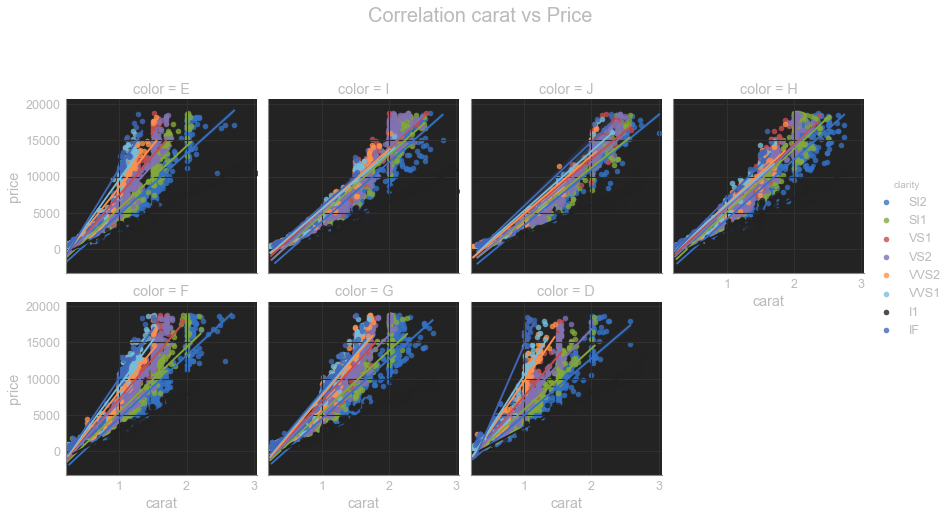

<Figure size 1800x1080 with 0 Axes>

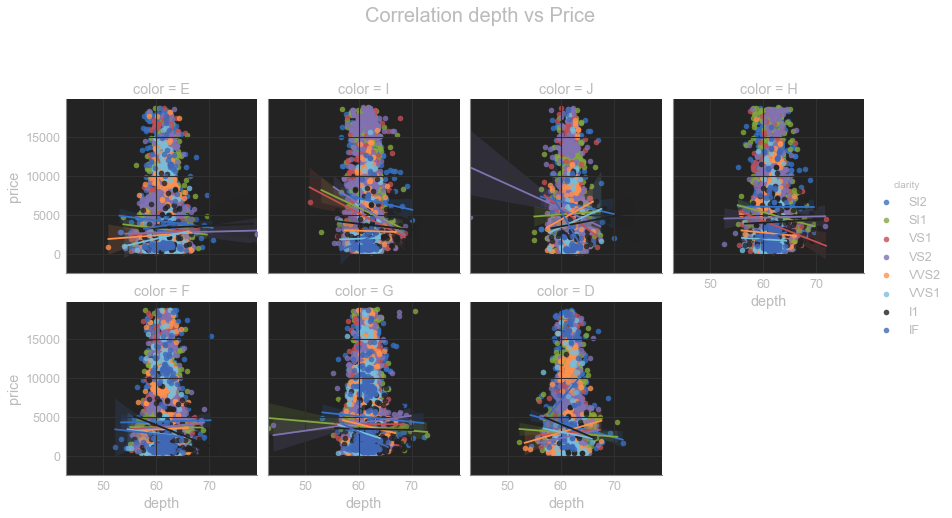

<Figure size 1800x1080 with 0 Axes>

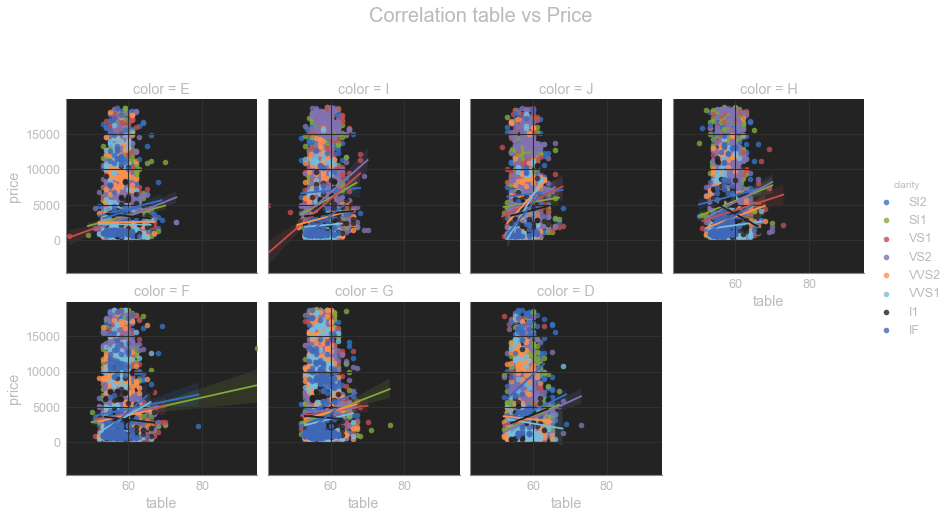

<Figure size 1800x1080 with 0 Axes>

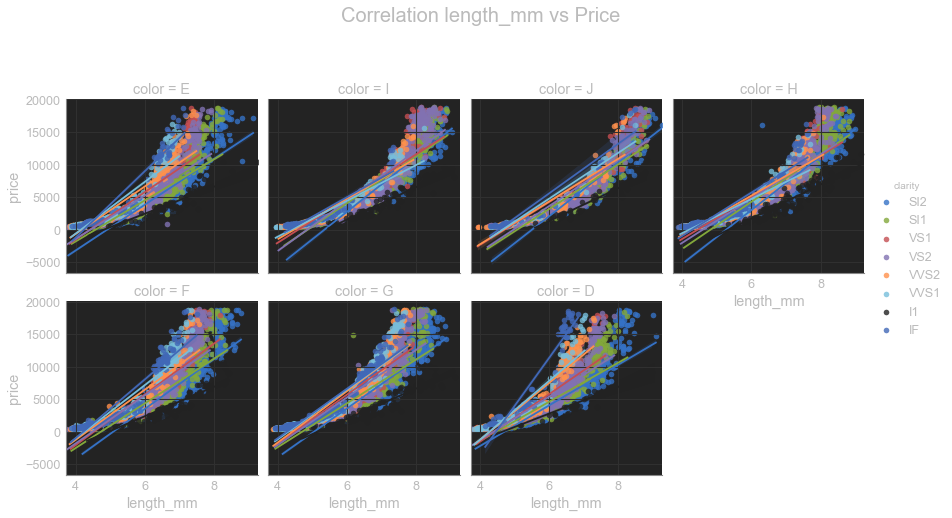

<Figure size 1800x1080 with 0 Axes>

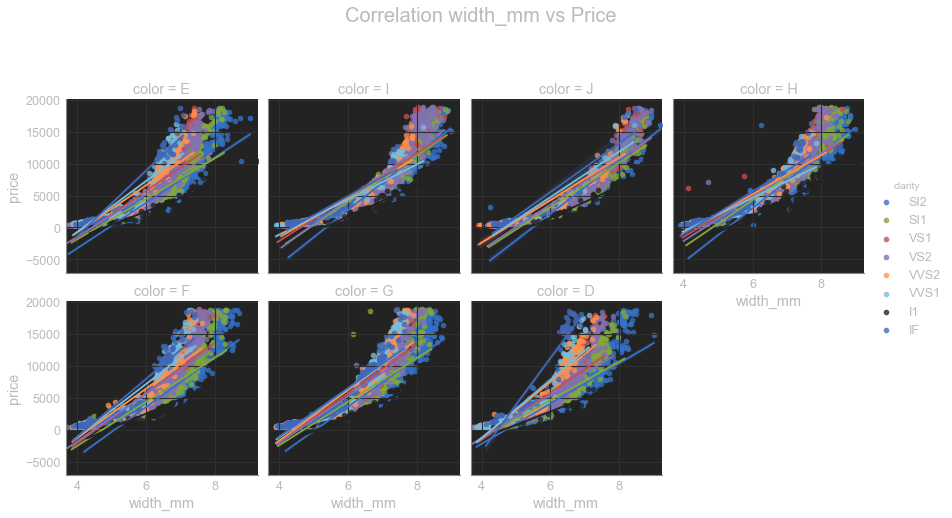

<Figure size 1800x1080 with 0 Axes>

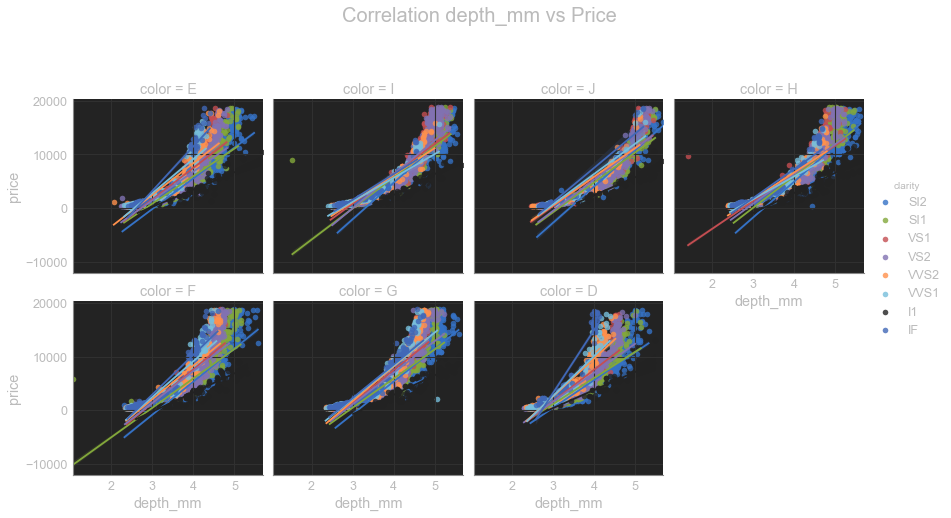

In [59]:
x_plt=["carat", "depth", "table", "length_mm", "width_mm", "depth_mm"]
for i in range(0,len(x_plt)):
    plt.figure(figsize = (25,15));
    sns.lmplot(x= x_plt[i], y="price", data=df, hue="clarity", col="color", col_wrap=4, height=3);    
    plt.suptitle("Correlation "+x_plt[i]+" vs Price", fontsize=20, y=1.15);

#### **Conclusion:**
* **Out of all 4 C's, Carat plays the most important role in deciding the Diamonds to invest the most valuable product to maximize Profit.**

# <font color='#D35400'>3.0 Data Mining </font>

**Segmenting Feature Selection**

<font color='#B7950B'>**DiAna allows to dynamically choose the best columns(Features) which are correlated to the Targeted variable. This can be done directly by Class Filter and is always helpful to visualize the relation between the Target variable and each of the predictors to get a better sense of data.**</font>

In [60]:
# class offerinf dynaminc Feature Selction and Plot the Data
class Filter:
    """The Filter Class is used to filter the main dataframe into different combinations of dataframes """
    def __init__(self, df):
        self.df = df

    def combo_df(self, car_low, car_hig, col, cla, price_var):      
        '''First filter the data set according to the arguments given'''#the carat values, between 0.4 - 0.44
        try:
            df2 = df[(((df.carat) > car_low) & ((df.carat) < car_hig) & ((df.color)== col) &((df.clarity)==cla))==True]
            df2["purchase_price"]= df2.price*df2.carat
            df2["IDEX_price"]= df2.carat*price_var
            df2["Diff_price"]= df2["IDEX_price"]-df2["purchase_price"]     
    
            refine_df = df2[["cut","purchase_price","IDEX_price"]]
        
            tidy = refine_df.melt(id_vars='cut').rename(columns=str.title)
            fig, axes = plt.subplots(1,2, figsize=(20,10))
            sns.barplot(x='Cut', y='Value', hue='Variable', data=tidy, ax=axes[0]);   
            sns.boxplot(y=tidy["Value"], x=tidy["Cut"],hue=tidy['Variable'], showmeans=True, ax=axes[1]);
            plt.legend(bbox_to_anchor=[1, 1.01])# to move the legend outside the figure;
        except ValueError:
            print(" Warning: There are no combinations found for these Entries. Please try again!")        
        return sns.despine(fig)

In [61]:
# Assign Features Selection to compare Price difference with 4Cs's
plot_class = Filter(df)
set_col = str(input("Enter the Diamond Color :"))
set_cla = str(input("Enter the Diamond Clarity : "))
set_car_low = float(input("Enter the Lower_range value of Carat :"))
set_car_hig = float(input("Enter the Higher_range value of Carat :"))
set_price = int(input("Enter per Carat Price :"))
plt1 = plot_class.combo_df(set_car_low,set_car_hig,set_col,set_cla, set_price)
plt1

KeyboardInterrupt: Interrupted by user

**More Plots for  Extended Data Visualizations & Analysis**

In [ ]:
ax = sns.barplot(x='cut', y='price', hue='color', data=df)
ax.legend(loc='upper right', ncol=4)
ax.set_xlabel('Cut', fontdict={'fontsize' : 15})
ax.set_ylabel('Price', fontdict={'fontsize' : 15})

In [ ]:
# Analysing Price correlation using the KDE(histogram)
hue_plt=["cut","clarity", "color"]
for i in range(0,len(x_plt)):
    try:
        plt.figure(figsize = (10,5))
        sns.kdeplot(x = "price", data = df, hue = hue_plt[i])
        plt.xlabel("Price", fontsize = 12)
        plt.ylabel("Values", fontsize = 12)
        plt.title("The price of diamonds based on different "+ hue_plt[i])
        plt.show();
    except IndexError:
        pass              

In [ ]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "carat", y = "price", data = df, hue = "cut", palette = "viridis")
plt.xlabel("Carat")
plt.ylabel("Price")
plt.title("Price vs Carat")
plt.show();

# <font color='#D35400'>4.0 DiAna Advancements </font>

**The above plots reveal wide scope for further advancements and expereince new findings in our Diamond Dataframe. Hence, DiAna continues to come up with extended Big Data Analytics observations in its next version.**  